## IMPORT LIBRARY

In [1]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from PIL import Image

2023-11-16 12:21:30.970107: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 12:21:31.486813: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 12:21:31.489729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 12:21:37.357266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# PREPROCESSING DATA

In [2]:
local_file = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/horse-or-human')
zip_ref.close()

In [3]:

local_file = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/validation-horse-or-human')
zip_ref.close()

In [4]:
# Membuat class myCallback untuk menghentikan training ketika akurasi sudah mencapai 86% dan val_acc sudah mencapai 86%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.84 and logs.get('val_acc') > 0.84:
            print("\nAkurasi telah mencapai >86%!")
            self.model.stop_training = True

In [5]:
TRAINING_DIR = 'data/horse-or-human'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=128, # 128 images per batch 
    class_mode='binary' # binary labels
    )

        
VALIDATION_DIR = 'data/validation-horse-or-human'
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150, 150),  # Resize images to 150x150
batch_size=32,
class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# DEFINE MODEL

In [9]:
    model = tf.keras.models.Sequential([
        # Convolution layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),

        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])







In [10]:
# lihat arsitektur model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 16)        9232      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 20736)             0         
                                                                 
 dense_7 (Dense)             (None, 64)               

# COMPILE A MODEL

In [13]:
# Compile a Model

"""
Kasus yang dihadapi disini adalah binary class jadi kita harus menggunakan loss function yang bernama binary crossentropy

"""
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['acc']
   
)

# Train the model

callbacks = myCallback()

history = model.fit(
    train_generator,
    epochs=5,
    verbose=1,
    validation_data=validation_generator,
)

Epoch 1/5
9/9 [==============================] - 31s 3s/step - loss: 0.4378 - acc: 0.8608 - val_loss: 1.0295 - val_acc: 0.6641
Epoch 2/5
9/9 [==============================] - 28s 3s/step - loss: 0.1454 - acc: 0.9357 - val_loss: 0.6489 - val_acc: 0.8320
Epoch 3/5
9/9 [==============================] - 29s 3s/step - loss: 0.0744 - acc: 0.9708 - val_loss: 1.4471 - val_acc: 0.7773
Epoch 4/5
9/9 [==============================] - 29s 3s/step - loss: 0.0455 - acc: 0.9834 - val_loss: 1.5071 - val_acc: 0.7773
Epoch 5/5
9/9 [==============================] - 28s 3s/step - loss: 0.0286 - acc: 0.9922 - val_loss: 1.0723 - val_acc: 0.8320


# PERFORMING ERROR ANALYSIS

<Figure size 640x480 with 0 Axes>

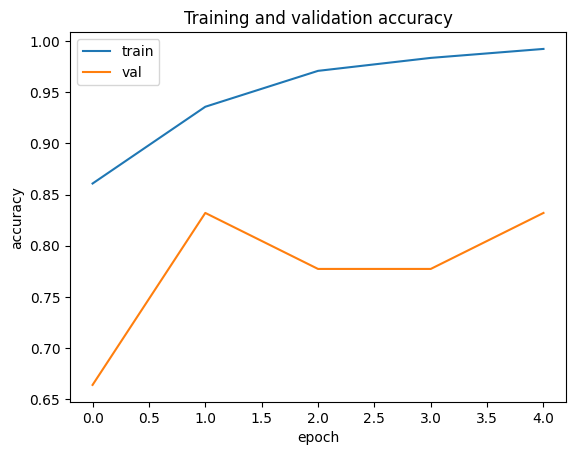

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data sets for each training epoch

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot training and validation accuracy per epoch

plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

In [16]:
# save model

model.save("horse-or-human.h5")

/media/abdulhafidh/New Volume1/Syiah Kuala University/Computer Science/7th Semester (8 SKS)/Assistant/Praktikum/LAB AI/prakai/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# INFERENCE

In [15]:
# Function to predict the class of the uploaded image
from keras.preprocessing import image
import numpy as np

def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    return classes[0][0]

# Upload an image from your local system
def upload_and_predict():
    image_path = input("Enter the file path of the image: ")
    confidence = predict_image_class(image_path)
    if confidence > 0.5:
        print(f"The image is predicted as a human")
    else:
        print(f"The image is predicted as a horse")

# Perform the image upload and prediction
upload_and_predict()

1/1 [==============================] - 0s 233ms/step
The image is predicted as a horse
